In [80]:
import numpy as np
import os # Operational system
from glob import glob # Managing directories
from zipfile import ZipFile # Unzipping files
from tensorflow import keras
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import scipy.misc
from scipy import ndimage
from PIL import Image, ExifTags
from PIL.ExifTags import *

%matplotlib inline

In [ ]:
# The goal here is explore the dataset, managing its directories,
# images and labels

In [81]:
# Downloading the dataset
# from: https://ieee-dataport.org/documents/malaria-thick-blood-smears#files

#!wget https://data.lhncbc.nlm.nih.gov/public/Malaria/Thick_Smears_150/ThickBloodSmears_150.zip
    
 # Unzipping the database in a directory

#with ZipFile('ThickBloodSmears_150.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   #zipObj.extractall('thick-blood-smears-150')

In [82]:
thickBlood = '../thick-blood-smears-150'

In [83]:
# Getting patient's identification

def patient_checker(direct):
    index = len('../thick-blood-smears-150/')
    
    return direct[index: -1]

In [84]:
def getSamplesNameFromPatient(patient, verbose = False):
    path = "" + thickBlood + "/GT_updated/" + patient + "/*.txt"
    samples = glob(path)

    if(verbose):
        print("Patient " + patient + " has " + str(len(samples)) + " samples.")
    
    return samples

def getImagesNameFromPatient(patient):
    path = "" + thickBlood + "/" + patient + "/*.jpg"
    images = glob(path)
    
    return images
    
def imagePath2InfoPath (path):
    print(path)
    path = path.replace(thickBlood, thickBlood + "/GT_updated", 2)
    path = path.replace("jpg", "txt", 2)
    
    return path
    
def getAllInfo (patients, verbose = False):
    cells = 0
    countSamples = 0
    
    print("There are " + str(len(patients)) + " patients.")
    
    for patient in patients:
        samples = getSamplesNameFromPatient(patient, False)
        
        patientCells = 0
        
        countSamples += len(samples)
        
        for sample in samples:
            info = pd.read_csv(sample)
            
            patientCells += len(info)
            
        if(verbose):
            print("Patient " + patient + " has " + str(len(samples)) + " samples and " + str(patientCells) + " cells.")
        
        cells += patientCells
        
    print("Total images: "+ str(countSamples) +  ", total cells: " + str(cells) + ".")

In [85]:
# Walking through directories that correspond to patient's identification

directories = glob(thickBlood + "/*/", recursive = True)

In [86]:
# Getting only the identification of patients

patients = list(map(patient_checker, directories))
patients.remove('GT_updated')

In [87]:
samples = getSamplesNameFromPatient(patients[0], True)

Patient TF57_CV11 has 10 samples.


In [88]:
#df = pd.read_csv(samples[0])

In [89]:
cells = getAllInfo(patients, False)

There are 150 patients.
Total images: 1830, total cells: 119958.


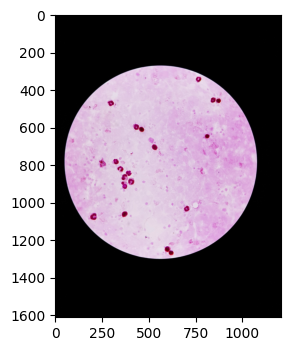

In [90]:
# Running an example and showing the result

examples = getImagesNameFromPatient(patients[3])

imgPath = examples[0]
img = cv2.imread(imgPath)

alpha = 0.4

img = cv2.resize(img, ((int(img.shape[1] * alpha)), int(img.shape[0] * alpha)))

plt.rcParams['figure.dpi'] = 100 

plt.imshow(img)

In [91]:
infoPath = imagePath2InfoPath(imgPath)

../thick-blood-smears-150/TF137_US8/20170831_213948.jpg


In [77]:
info = pd.read_csv(infoPath, skiprows=1)
infoList = info.values

#img = ndimage.rotate(img, 90)

for point in infoList:
    px = point[5] * alpha
    py = point[6] * alpha
    
    center = (int(px), int(py))

    #print(center)
    #circle2 = plt.Circle(center, 10, color='r', fill=False)
    
    cv2.circle(img,
               center = center,
               radius = 20,
               color = (0,255,0),
               thickness = 2,)

point = infoList[5]
px = point[5] * alpha
py = point[6] * alpha
    
center = (int(px), int(py))

plt.close()
plt.cla()
plt.clf()
    
plt.imshow(img)


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


?PNG

   
IHDR  ?     /y?   IDATx?????:n ڛ????I????>eȢ-ɒ????A\?dW?>?????C?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @?  @? 